In this project I have used algorithm of Logistic Regression, KNN, Decision Tree and SVM(Support Vector Machine) ,Naives Baye's using a function so that we need not create different parameters for each model generating.
And i have observed minor difference in accuracy of the model .

•	What was Customer Rating? And was the product delivered on time?

Customer Rating is max for 1 and 3 & minimum for 2,4,5 acc to countplot
In Barplot we have seen that for customer rating with 3,4,5 maximum no of product is delivered.

•	Is Customer query is being answered?
Yes customer query is max answered.

•	If Product importance is high. having highest rating or being delivered on time?

Product importance is high at range of 0.65 with product delivered on time and when Product imp is compared with customer rating ie it is around 3.
So, product imp is high in case of customer rating

In [79]:
# Import all necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Import the dataset
data1=pd.read_csv("Downloads\Train.csv")

In [81]:
data1

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [82]:
# Checking the Initial Information of data set
data1.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [83]:
data1.shape

(10999, 12)

In [84]:
data1.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [85]:
# Data Cleaning part ie checking for null values, drop duplicates, etc
data1.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [86]:
data1=data1.drop_duplicates()

In [87]:
data1.shape

(10999, 12)

In [88]:
data1.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [89]:
data1.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [90]:
data1=data1.drop(['ID','Prior_purchases'],axis=1)

In [91]:
data1.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,low,F,44,1233,1
1,F,Flight,4,5,216,low,M,59,3088,1
2,A,Flight,2,2,183,low,M,48,3374,1
3,B,Flight,3,3,176,medium,M,10,1177,1
4,C,Flight,2,2,184,medium,F,46,2484,1


In [92]:
# EDA  part is to be done
# Create 2 list one list contains only continuos variable & 2nd list contain categorical variable
# a is continous n b is categorical 
a=['Cost_of_the_Product','Discount_offered','Weight_in_gms','Customer_care_calls']
b=['Warehouse_block','Mode_of_Shipment','Customer_rating','Gender','Product_importance']

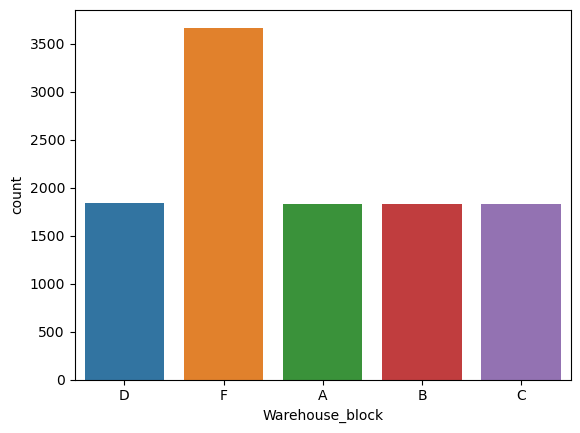

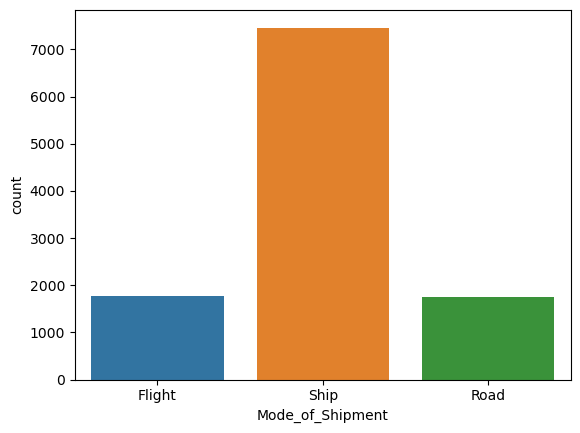

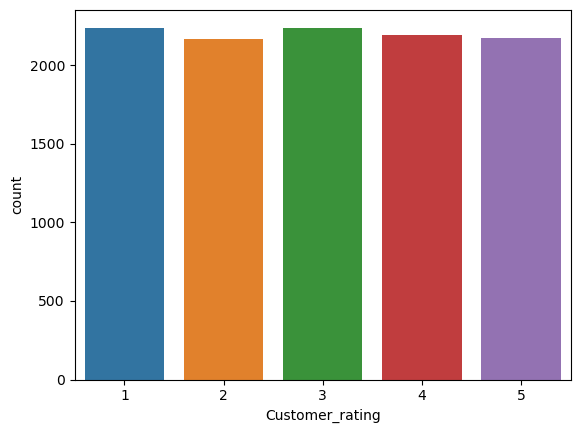

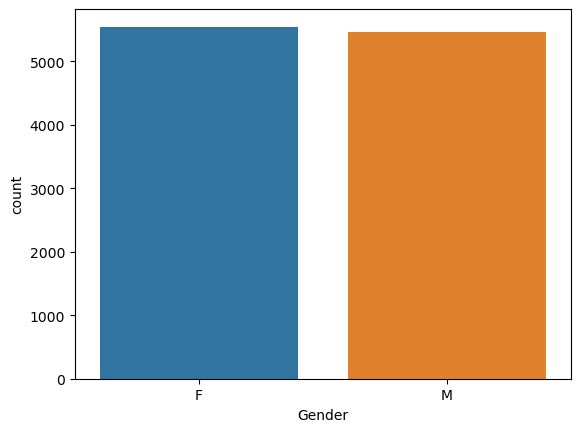

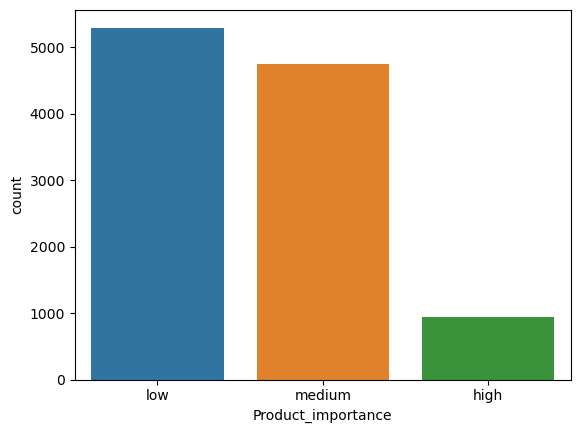

In [93]:
# here we need to count the no of datapoints so we are creating countplot
for i in b:
    sns.countplot(x=i,data=data1)
    plt.show()
    

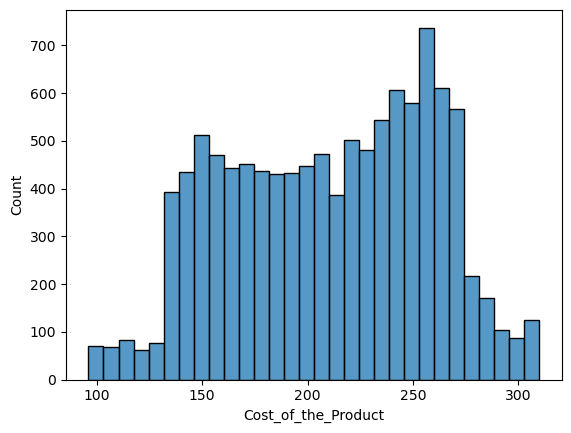

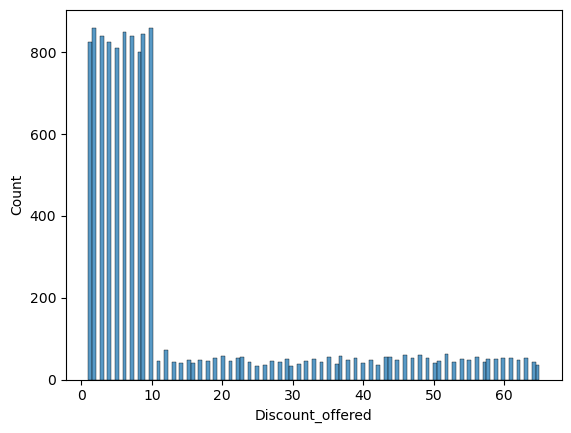

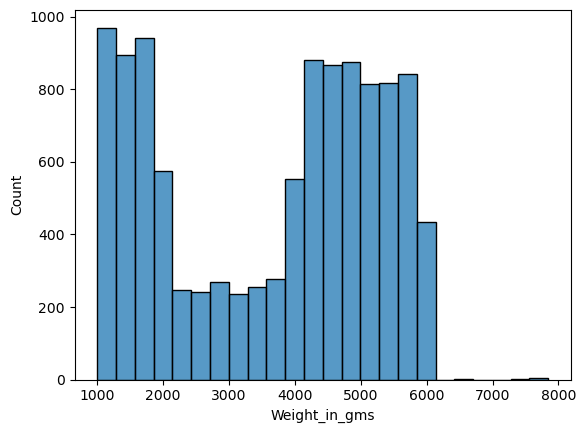

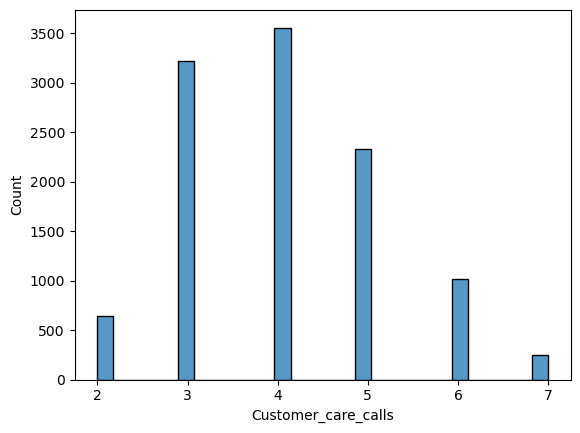

In [94]:
# Create the histogram bcoz here we have to find the frequency of datapoints
for  i in a:
    sns.histplot(x=i,data=data1)
    plt.show()

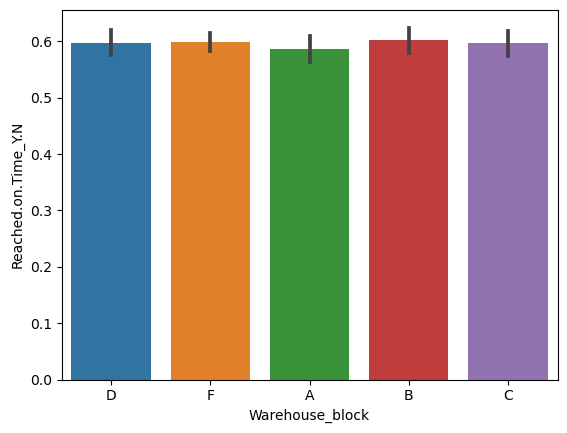

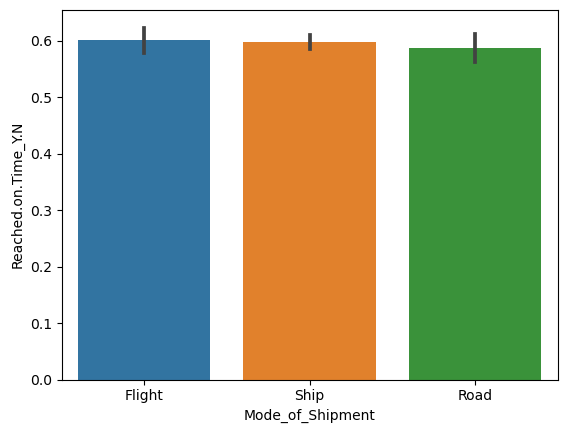

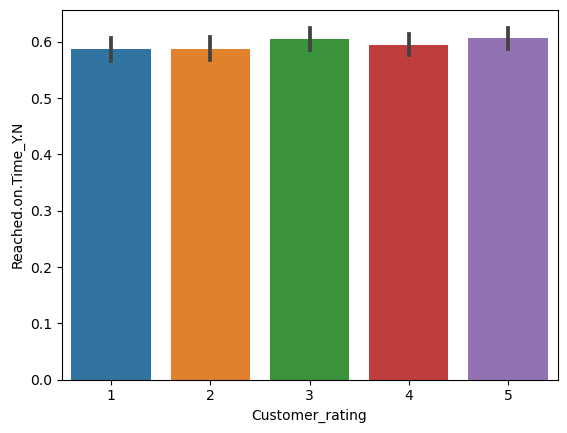

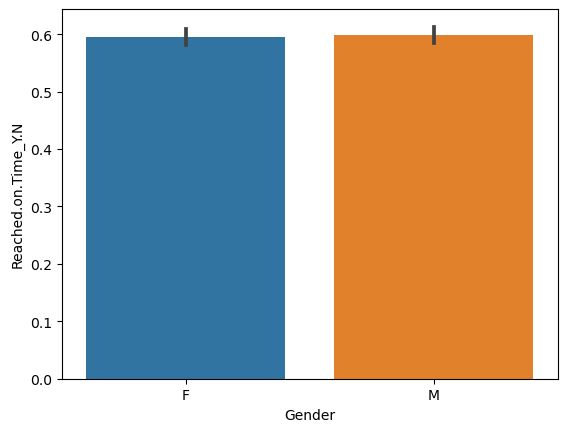

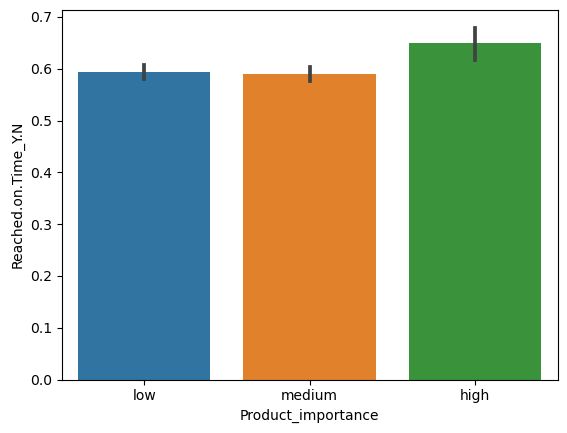

In [95]:
# Here we create barplot bcoz we want to compare dependent variable with independent one
# Independent variable on X axis n dependent variable on Y axis
for i in b:
    sns.barplot(x=i,y="Reached.on.Time_Y.N",data=data1)
    plt.show()

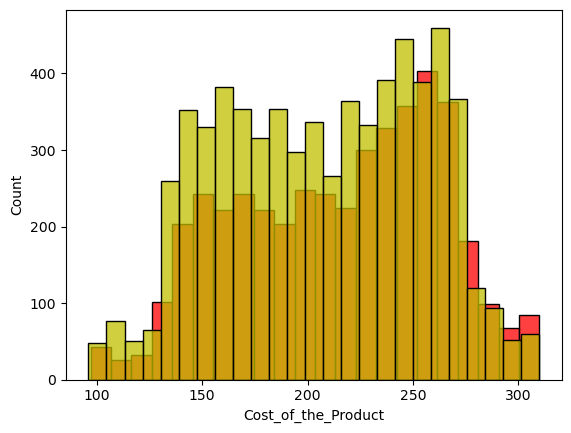

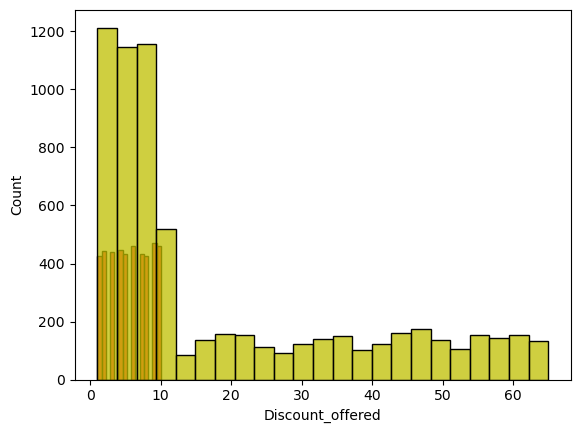

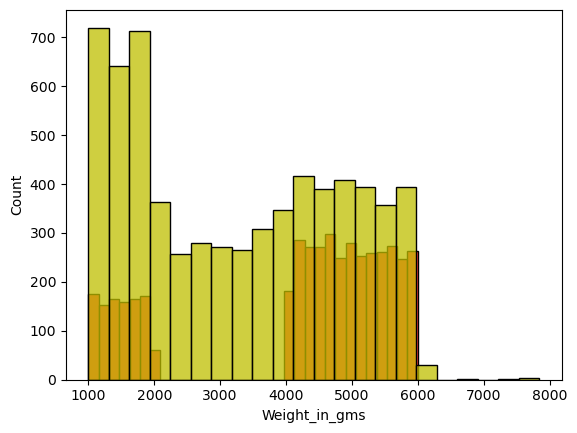

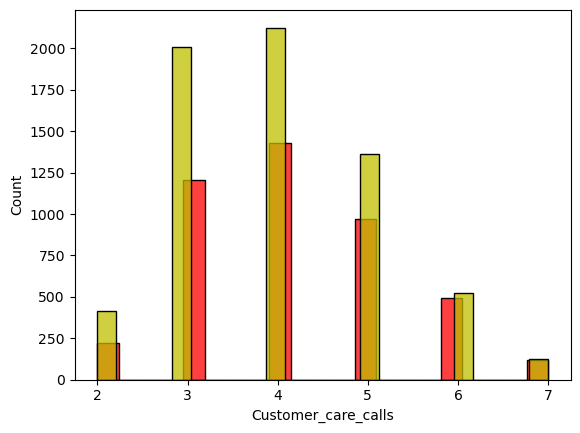

In [96]:
#In this we are trying to do the comparison of dependent varaible on basis of category
# On x axis taking each variable from dataset. Also taking the dependent variable but we are sepearting it by Reached on time or Not
for i in a:
    sns.histplot(x=data1[i][data1["Reached.on.Time_Y.N"]==0],color='r')  # Reached on time
    sns.histplot(x=data1[i][data1["Reached.on.Time_Y.N"]==1],color='y')  # Not reached on time
    plt.show() 

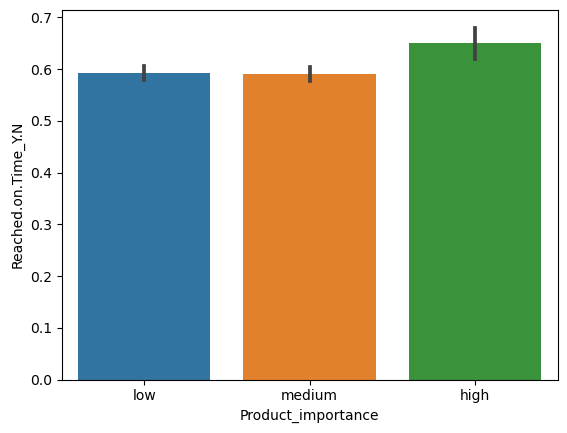

In [97]:
# Here we are creating a barplot to find the relation b/w Product imp and Product delievered on time
sns.barplot(x="Product_importance",y="Reached.on.Time_Y.N",data=data1)
plt.show()

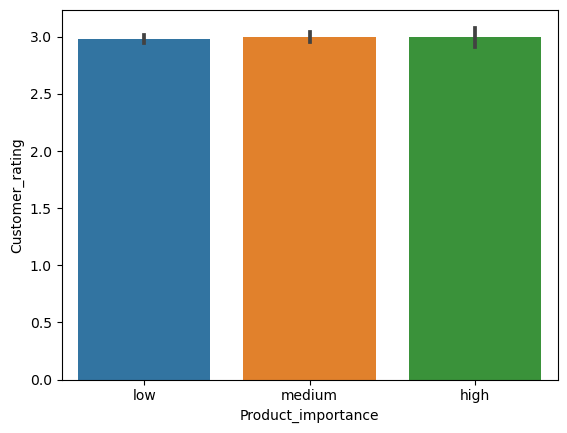

In [98]:
# Here we are creating a barplot to find the relation b/w Product imp and Customer rating
sns.barplot(x="Product_importance",y="Customer_rating",data=data1)
plt.show()

In [99]:
# Finding Corealtion for HeatMap
cor=data1.corr()
cor

C:\Users\hi\AppData\Local\Temp\ipykernel_2076\574895328.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data1.corr()


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012209,0.323182,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,-0.138312,-0.132604,-0.073587
Discount_offered,-0.130750,-0.003124,-0.138312,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,0.397108,-0.268793,1.000000


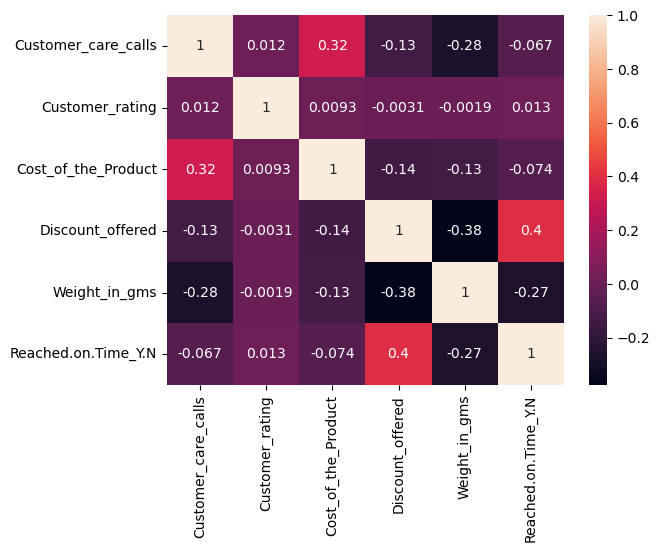

In [100]:
sns.heatmap(cor,annot=True)
plt.show()

In [101]:
# Seperate dependent and independent varaible
x=data1.drop("Reached.on.Time_Y.N",axis=1)
y=data1['Reached.on.Time_Y.N']

In [102]:
x.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Product_importance,Gender,Discount_offered,Weight_in_gms
0,D,Flight,4,2,177,low,F,44,1233
1,F,Flight,4,5,216,low,M,59,3088
2,A,Flight,2,2,183,low,M,48,3374
3,B,Flight,3,3,176,medium,M,10,1177
4,C,Flight,2,2,184,medium,F,46,2484


Since there are 4 categorical data ie  Warehouse block, Mode Of shipment, Gender n Product importance(string values) so we need to convert them to binary 

In [103]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [104]:
from sklearn.compose import ColumnTransformer

In [105]:
encoder1=ColumnTransformer([('one',OneHotEncoder(),[0,1,5,6]),('sc',StandardScaler(),
                                                         [2,3,4,7,8])],remainder='passthrough')

In [106]:
newdata=encoder1.fit_transform(x)

In [107]:
type(newdata)

numpy.ndarray

In [108]:
pd.DataFrame(newdata).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.047711,-0.700755,-0.690722,1.889983,-1.468240
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.047711,1.421578,0.120746,2.815636,-0.333893
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.799887,-0.700755,-0.565881,2.136824,-0.159002
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.923799,0.006689,-0.711529,-0.208162,-1.502484
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.799887,-0.700755,-0.545074,2.013404,-0.703244


#### Create Train and Test Dataset

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
xtrain,xtest,ytrain,ytest=train_test_split(newdata,y,train_size=0.8)

In [111]:
xtrain.shape

(8799, 18)

In [112]:
ytrain.shape

(8799,)

In [114]:

def mymodel(model):
 model.fit(xtrain, ytrain)
 ypred = model.predict(xtest)
 train_accuracy = model.score(xtrain,ytrain)
 test_accuracy = model.score(xtest,ytest)

 print("Model :-",str(model))

 print('\nModel Accuracy is : ', accuracy_score(ytest, ypred))
 print(f'\nTraining Accuracy is : {train_accuracy} ,\nTesting Accuracy is  :{test_accuracy}')
 print('--------------------------------------')
 print()
 return model

In [117]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
knn = mymodel(KNeighborsClassifier())
svc = mymodel(SVC())
dt = mymodel(DecisionTreeClassifier())
lr = mymodel(LogisticRegression())
gnb = mymodel(GaussianNB())
rfc = mymodel(RandomForestClassifier())


Model :- KNeighborsClassifier()

Model Accuracy:  0.6327272727272727

Training Accuracy: 0.7790658029321513 ,
Testing Accuracy :0.6327272727272727
--------------------------------------

Model :- SVC()

Model Accuracy:  0.6581818181818182

Training Accuracy: 0.7039436299579498 ,
Testing Accuracy :0.6581818181818182
--------------------------------------

Model :- DecisionTreeClassifier()

Model Accuracy:  0.6427272727272727

Training Accuracy: 1.0 ,
Testing Accuracy :0.6427272727272727
--------------------------------------

Model :- LogisticRegression()

Model Accuracy:  0.6318181818181818

Training Accuracy: 0.6422320718263439 ,
Testing Accuracy :0.6318181818181818
--------------------------------------

Model :- GaussianNB()

Model Accuracy:  0.6422727272727272

Training Accuracy: 0.6525741561541084 ,
Testing Accuracy :0.6422727272727272
--------------------------------------

Model :- RandomForestClassifier()

Model Accuracy:  0.6531818181818182

Training Accuracy: 1.0 ,
Testing Ac